<a href="https://colab.research.google.com/github/gbaere/analise-de-dados-airbnb-lisboa/blob/main/analise_de_dados_airbnb_lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos Dados do Airbnb em Lisboa, Portugal**
# *Data Exploration on Lisboa Airbnb*


---


**Autor: Guilherme Bender A. Baere** | [guilhermebaere](https://www.linkedin.com/in/guilhermebaere/)


---



Atualmente, o aplicativo Airbnb é considerado como a maior empresa hoteleira da atualidade, seguida do Booking.com

O aplicativo conecta pessoas que ao viajar desejam se hospedar em imóveis fora das redes hoteleiras para fornecer ao seus usuários uma experiência próxima ao do morador local.

Desta forma, coloca o viajante em contato diretamente com o anfitrião (geralmente o proprietário), assim sendo, o Airbnb fornece uma plataforma inovadora para operacionalizar essa hospedagem alternativa.

Outrossim, Airbnb disponibiliza seus dados das principais cidades do mundo,  por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Portanto, o objetivo da minha análise foi aprimorar meus estudos no curso Data Science na Prática 2.0 by sigmoidal.ai, além do meu grande interesse por viagens, a fim de realizar algumas analises para identificar padrões sobre o aluguel de imóveis do Airbnb em Lisboa.

Por fim, analisaremos, principalmente os locais com maior oferta, a média de preço e qual a média do mínimo de noites para aluguel na cidade, fornecendo também uma visão espacial através de mapas.


---


## **Lisboa**

A capital de Portugal, é a cidade que mais recebe brasileiros no continente europeu, e uma das cidades mais visitadas na Europa.

Isto posto, o turismo local cresceu com essa demanda, ocasionando também uma bolha imobiliária, muito pelo investimento em compra de imóveis para locação e veraneio.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Informações resumidas e métricas para listagens em Lisboa (bom para visualizações).

O arquivo que estou utilizando teve os dados compilados em 13/02/2021.

In [2]:
# importar o arquivo listings_clean.csv para um DataFrame
lisboa_airbnb = pd.read_csv('https://raw.githubusercontent.com/gbaere/analise-de-dados-airbnb-lisboa/main/dataset/listings_clean.csv')

In [3]:
lisboa_airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_country',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nigh

In [4]:
lisboa_airbnb.describe()

,scrape_id,host_total_listings_count,bedrooms,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 75
count,2.100000e+02,209.000000,178.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,1.0,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,210.000000,210.000000,33.000000,1.0
mean,2.023061e+13,27.435407,1.808989,4.390476,13.500000,437.685714,518.314286,13.179524,470.235238,7.0,...,4.754688,4.660000,4.857188,4.828437,4.746562,4.662500,3.785714,0.109524,0.960909,0.0
std,0.000000e+00,70.964217,1.012648,7.109526,84.994582,402.732778,414.742413,84.540364,394.546008,NaN,...,0.288880,0.277593,0.150873,0.192557,0.225712,0.295198,10.068986,0.628208,1.008472,NaN
min,2.023061e+13,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,7.000000,7.0,...,3.670000,4.140000,4.440000,4.330000,4.000000,3.670000,0.000000,0.000000,0.000000,0.0
25%,2.023061e+13,2.000000,1.000000,1.000000,1.000000,56.250000,365.000000,1.000000,180.000000,7.0,...,4.690000,4.430000,4.777500,4.745000,4.637500,4.532500,0.000000,0.000000,0.340000,0.0
50%,2.023061e+13,4.000000,1.500000,2.000000,3.000000,365.000000,365.000000,2.900000,365.000000,7.0,...,4.810000,4.655000,4.880000,4.860000,4.770000,4.685000,0.000000,0.000000,0.970000,0.0
75%,2.023061e+13,16.000000,2.000000,3.000000,4.000000,365.000000,1125.000000,3.975000,654.800000,7.0,...,4.985000,4.922500,5.000000,5.000000,4.917500,4.865000,2.000000,0.000000,1.180000,0.0
max,2.023061e+13,590.000000,5.000000,31.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,7.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,73.000000,5.000000,4.660000,0.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['scrape_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['host_total_listings_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['minimum_minimum_nights'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['scrape_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['host_total_listings_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['minimum_minimum_nights'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['scrape_id', 'host_total_listings_count'], ['host_total_listings_count', 'bedrooms'], ['bedrooms', 'minimum_minimum_nights'], ['minimum_minimum_nights', 'maximum_minimum_nights']]], **{})
chart

# *Gráfico da origens dos proprietários dos imoveis.*

Essa informação, pode ser bastante útil e de interessante aos corretores de imoveis, imobiliárias (realstate) a fim de identificar e orientar ofertas de acordo com a origem dos investidores

<Axes: title={'center': 'Host Country'}>

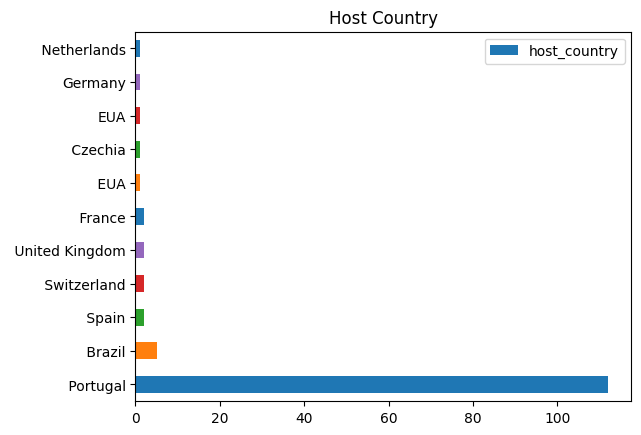

In [5]:
from matplotlib import colors
# removemos as linhas que tenham valor vazio através do comando dropna
lisboa_airbnb['host_country'].dropna().value_counts().plot(kind='barh',title='Host Country',legend='false', color=['C0', 'C1', 'C2','C3','C4'])

## *Gráficos de correção*

A ideia é verificar a correlação da avaliação da limpeza dos quartos na avaliação geral do local (imóvel)

Aqui verificamos que quanto pior é avaliação da limpeza menor também é a avalição geral. A ideia é aplicar em todas as avaliações a fim de verificar qual o peso de cada avaliação contribui para avaliação final. Fiz a avaliação eview_rating x review_cleanlines, entretando, poderia também utilizar as avaliações de localização, comunicação dentre outros disponiveis no dataframe.

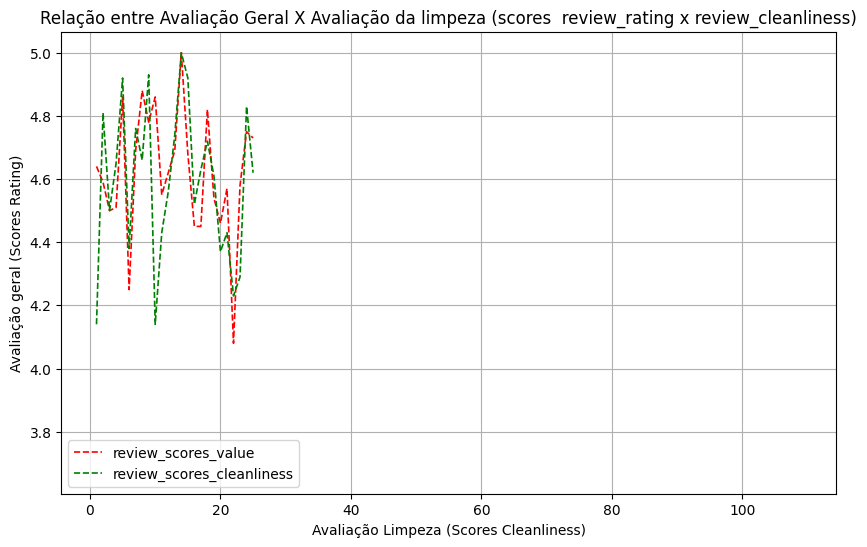

In [6]:
kwargs= dict (linestyle='dashed', color=['red', 'green'], linewidth=1.2)
line_plot = lisboa_airbnb.plot( y = ['review_scores_value', 'review_scores_cleanliness'], figsize= (10,6),**kwargs )
line_plot.set_title('Relação entre Avaliação Geral X Avaliação da limpeza (scores  review_rating x review_cleanliness)')
line_plot.grid()
line_plot.set_xlabel('Avaliação Limpeza (Scores Cleanliness)')
line_plot.set_ylabel('Avaliação geral (Scores Rating)');

Além do gráfico acima, podemos utilizar para visualizar a correlação de forma diferente, usei a função lmplot() da biblioteca seaborn. Se a linha está subindo temos uma relação positiva, caso contrário uma relação negativa:

Relação entre Avaliação Geral X Avaliação da Comunicação do Anfitrião (scores review_rating x review_scores_communication)



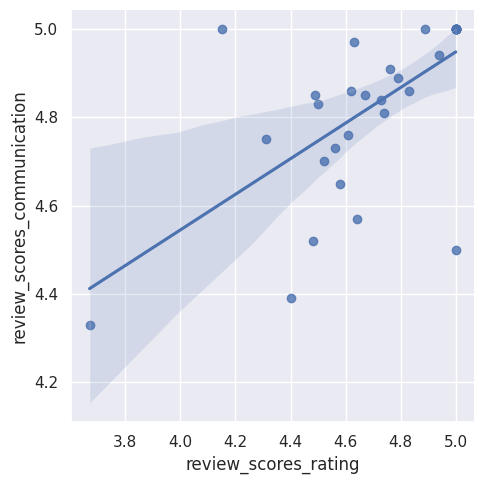

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

print('Relação entre Avaliação Geral X Avaliação da Comunicação do Anfitrião (scores review_rating x review_scores_communication)')
print('')
sns.lmplot(x='review_scores_rating',y='review_scores_communication', data=lisboa_airbnb)



Explorando um pouco mais a análise de correção, usei o gráfico de heatmap abaixo. Outra aplicação dessa analise seria verificar a correlação entre pares de ações da bolsa de valores, a fim de realizar operações do tipo long-short, quando um par de ações tem uma correlação negativa e muito forte entre elas.

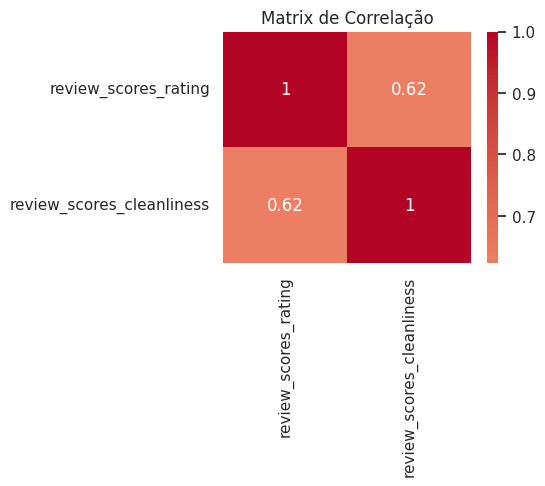

In [9]:
# Plotando uma matrix de correlação
correlation_matrix = lisboa_airbnb[["review_scores_rating", "review_scores_cleanliness"]].corr()

# Desenhando a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matrix de Correlação")
plt.show()

Como podemos interpretar os valores acima:

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

# *Gráfico de densidade de imóveis por bairro e faixa de preço por diárias*

A ideia mostrar a concentração de imoveis por bairro que atenda o critério de diárias cujo o valor são menores que $200 euros.

Foi necessário realizar tratamento nos dados, que poderia ter realizado no próprio arquivo csv, entretando, preferi tratar via código, como podem verificar abaixo:

[]

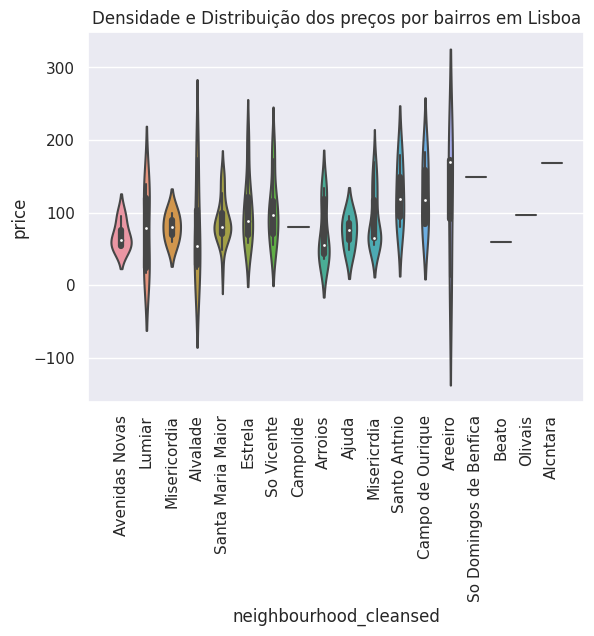

In [23]:
import pandas as pd
import seaborn as sns

# Removendo os valores não finitos
lisboa_airbnb = lisboa_airbnb.dropna(subset=["price"])

# Criando uma cópia da coluna "price"
lisboa_airbnb["price_str"] = lisboa_airbnb["price"].astype(str)

# Remover o caractere '$' e as vírgulas
lisboa_airbnb["price_str"] = lisboa_airbnb["price_str"].str.replace("[\$,]", "", regex=True)

# Converter para float
lisboa_airbnb["price"] = lisboa_airbnb["price_str"].astype(float)

# Agora podemos prosseguir com o resto do codigo, o tratamento acima poderia ser realizado diretamente no arquivo CSV :-)
max_price = lisboa_airbnb[lisboa_airbnb["price"] < 200]
neighbourhood = max_price[max_price["neighbourhood_group_cleansed"] == 'Lisboa'] #filtro por bairros somente de lisboa

viz = sns.violinplot(data=neighbourhood, x='neighbourhood_cleansed', y='price')
viz.set_title('Densidade e Distribuição dos preços por bairros em Lisboa')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)

# Exibir o gráfico
viz.plot()

## **Visualização Espacial**

Aqui começa a ficar mais interessante a visualização das informações, colocamos no mapa a localidade de cada imóvel em função da sua latitude e longitude e colorizamos conforme o pontuação da avaliação da localidade, ainda, mostramos uma barra com o range maximo e minimo das avaliações.

Deste modo, podemos verificar o que o hospede de cada imóvel acha da localização, sendo assim, podemos ter um panorama da região e verificar os demais hospedes de imoveis na mesma região também compartilham da mesma avaliação.

In [32]:
import pandas as pd
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiYmVuZGVyZ2JhYiIsImEiOiJjbGp6eG1pd2EwMWQ2M2ZuZWh1eHkzZXhjIn0.d7uaXTbVLt8wbV1gftwVFg"

# Removendo as linhas com valores nulos na coluna 'review_scores_location'
lisboa_airbnb.dropna(subset=['review_scores_location'], inplace=True)

fig = go.Figure(go.Scattermapbox(
        lat=lisboa_airbnb.latitude,
        lon=lisboa_airbnb.longitude,
        text=lisboa_airbnb.name,
        mode='markers',
        marker=dict(
            size = 15,
            showscale=True,
            colorscale='Inferno', # paleta de cores
            color=lisboa_airbnb.review_scores_location,
            cmin=min(lisboa_airbnb.review_scores_location),
            cmax=max(lisboa_airbnb.review_scores_location),
            colorbar=dict(title='Airbnb Review Scores')
        ),
        textfont=dict(color='black'),
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.71904, # latitude do centro de lisboa
            lon=-9.13269 # longitude do centro de lisboa
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

# **Combinando visualização espacial e mapa de calor**

In [27]:
import pandas as pd
import folium
from folium.plugins import HeatMap

loc = 'Distribuição por densidade dos imoveis por região'
title_html = '''
             <h2 align="left" style="font-size:20px"><b>{}</b></h2>
             '''.format(loc)

map_folium = folium.Map([38.857501,-9.258780], zoom_start=9, control_scale=True, height=600, width=600)
HeatMap(lisboa_airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)

map_folium.get_root().html.add_child(folium.Element(title_html))

display(map_folium)

# Wordcloud ou nuvem de palavras

É um tipo de visualização de dados e ferramenta de Data Science usado quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo-as, também, em ângulos diferentes. Mas nesse exemplo, fui um pouco mais além, usei uma imagem com os limites geográficos de Portugal, colocando a nuvem dentro desse limite, e colorizando as palavaras com palete de cores da bandeira do país.

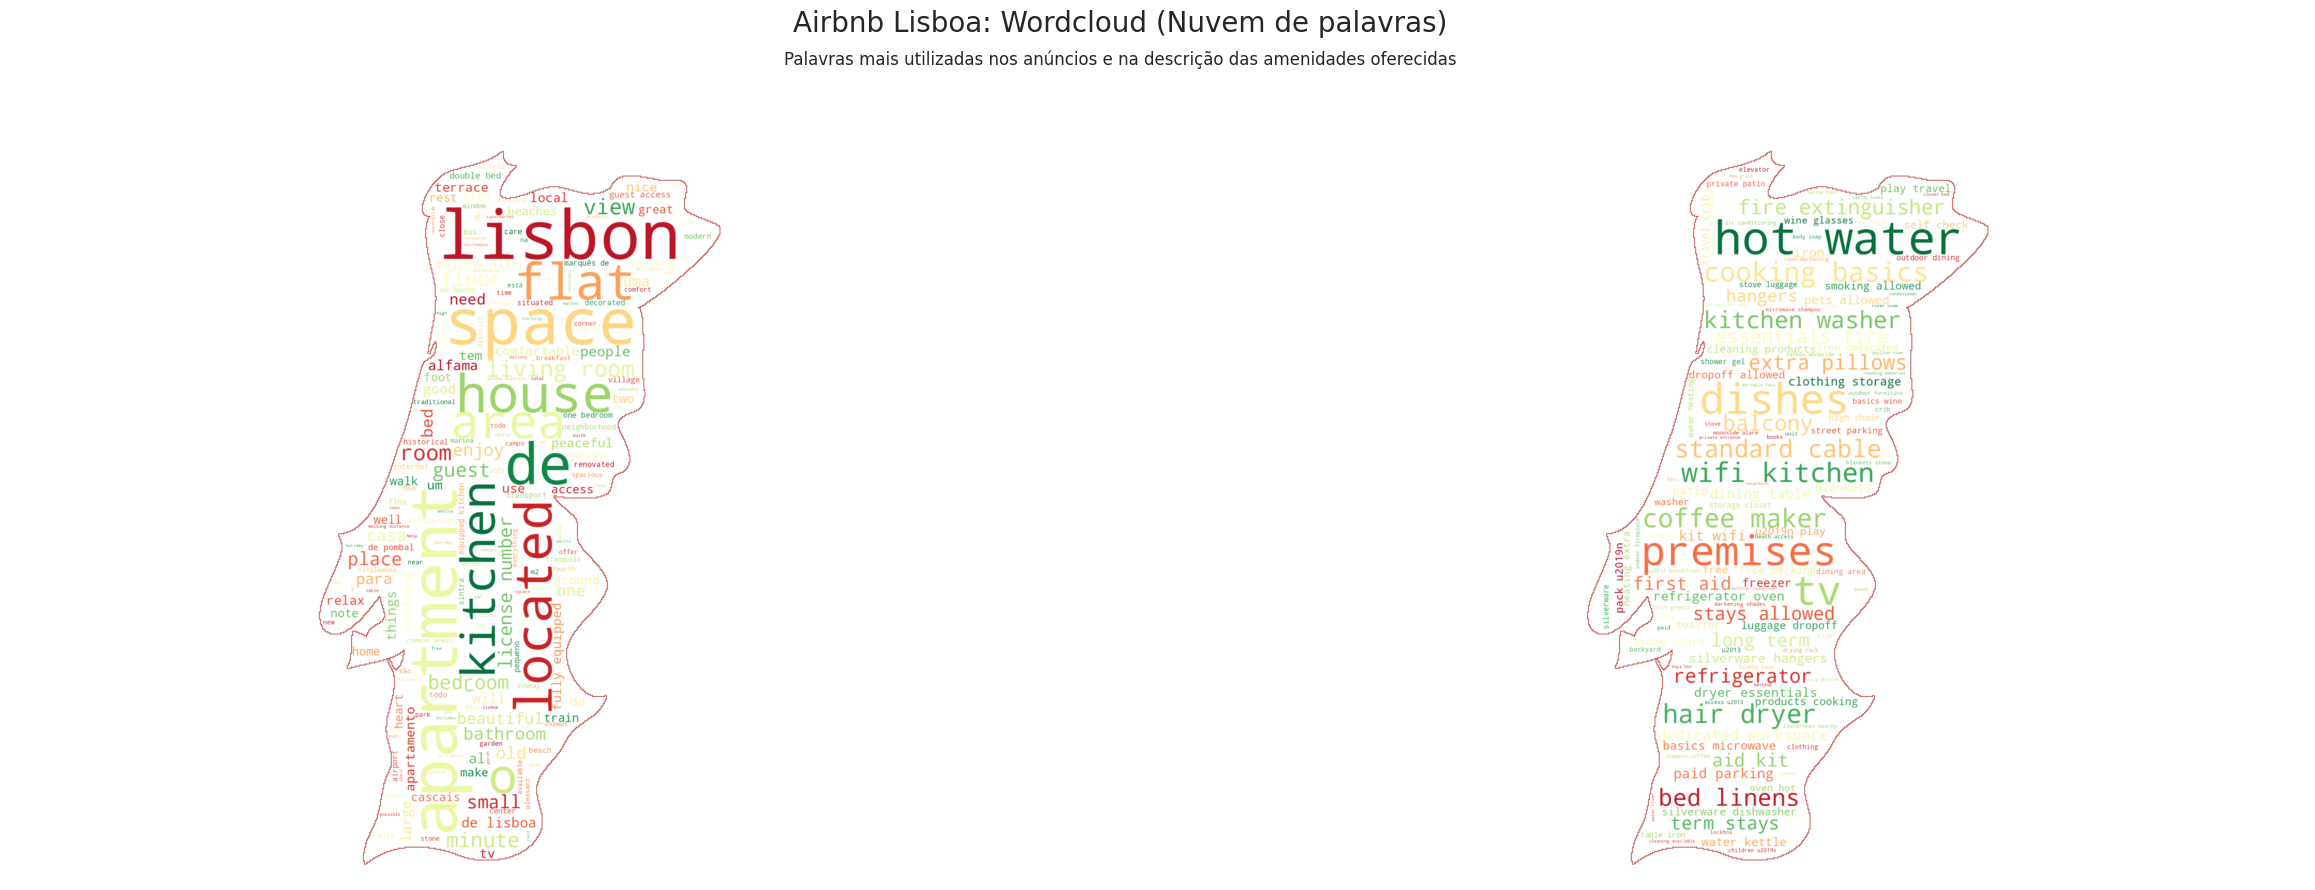

In [43]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

text  = ' '.join(str(n).lower() for n in lisboa_airbnb.description)

text_1 = ' '.join(str(n).lower() for n in lisboa_airbnb.amenities)

fs, axs = plt.subplots(1, 2, figsize=(30,10))
plt.suptitle("Airbnb Lisboa: Wordcloud (Nuvem de palavras)", fontsize=20)
plt.figtext(0.5, 0.925, 'Palavras mais utilizadas nos anúncios e na descrição das amenidades oferecidas',
            wrap=True, horizontalalignment='center', fontsize=12)

# removendo algumas strings indesejadas
stop_words = ["https", "co", "RT", 'br', 'e', '<b>', 'b', '<br>', '<br/>', '\r', 'r'] + list(STOPWORDS)

# Busca a imagem a partir da URL usando o requests
url = 'https://raw.githubusercontent.com/gbaere/analise-de-dados-airbnb-lisboa/main/dataset/portugal_mask.png'
response = requests.get(url)
mask_pos = Image.open(BytesIO(response.content))


# Gera a imagem de nuvem de palavras
wordcloud_description = WordCloud(
    scale=3, stopwords=stop_words, max_words=200,
    background_color='white', colormap='RdYlGn',
    mask=np.array(mask_pos),
    width=400, height=300,
    contour_width=1, collocations=True, contour_color='firebrick'
).generate(text)

wordcloud_amenities = WordCloud(
    scale=3, stopwords=stop_words, max_words=200,
    background_color='white', colormap='RdYlGn',
    mask=np.array(mask_pos),
    width=400, height=300,
    contour_width=1, collocations=True, contour_color='firebrick'
).generate(text_1)

#plt.figure(figsize=(40,40))
#Display the image
axs[0].imshow(wordcloud_description, interpolation='bilinear')
axs[0].axis('off')

axs[1].imshow(wordcloud_amenities, interpolation='bilinear')
axs[1].axis('off')

plt.show()

Espero que tenham gostado deste estudo, e compreendido a gama de infinitas possibilidades do Data Science e poder da linguagem Python e suas bibliotecas.